In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

In [4]:
df.isnull().sum().sum()    #overall no of null values present in the dataset

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.describe().T    #Transpose

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [7]:
df["quality"].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

<AxesSubplot:xlabel='quality', ylabel='count'>

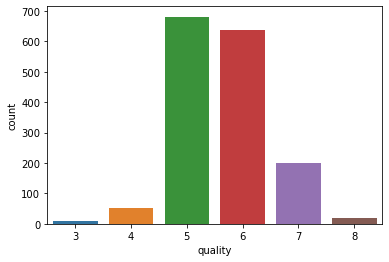

In [8]:
sns.countplot("quality", data=df)

In [9]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [10]:
df["quality"].value_counts(normalize=True)*100

5    42.589118
6    39.899937
7    12.445278
4     3.314572
8     1.125704
3     0.625391
Name: quality, dtype: float64

Here, data is imbalanced

In [11]:
c=0
for i in df["quality"]:
    if df["quality"][c]<7:
        df["quality"][c]= 0
        
    else:
        df["quality"][c]= 1
    c+=1

In [12]:
df["quality"].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [13]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.097308
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.071747
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057283
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.199485


can we delete df["residual sugar"] as it has only 0.0477 correlation with quality

<AxesSubplot:>

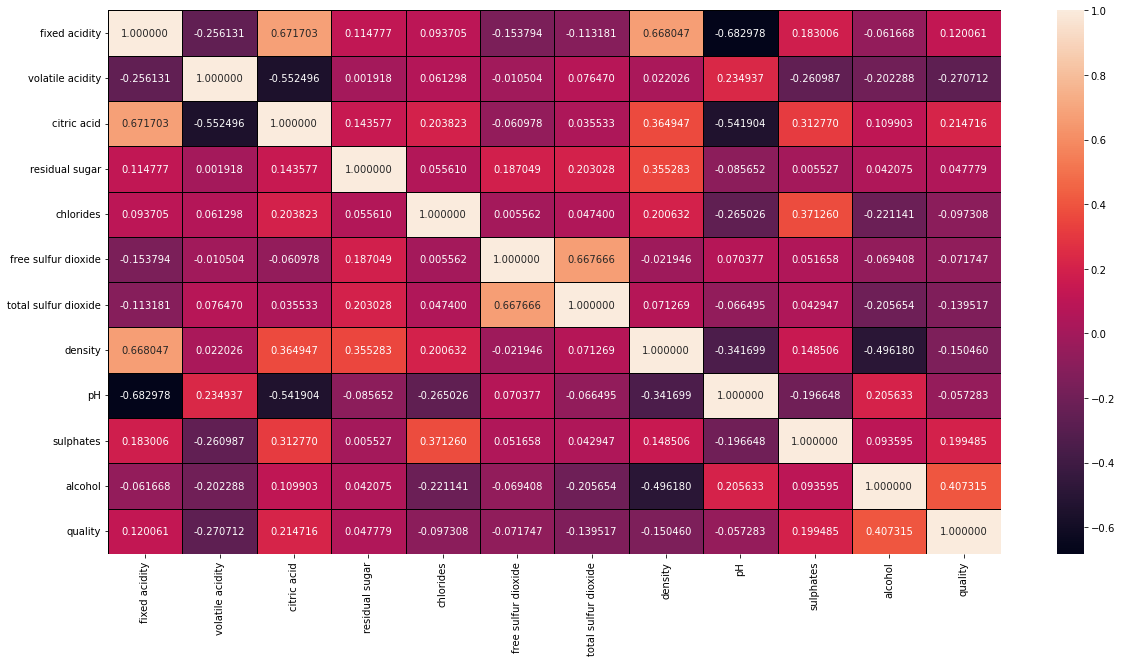

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor="black",fmt="f")

As we can observe few correlations are greater than 6.5, we need to delete them to avoid collinearity.

In [15]:
df= df.drop(["density","total sulfur dioxide","citric acid"], axis=1)

In [16]:
df.shape

(1599, 9)

<AxesSubplot:>

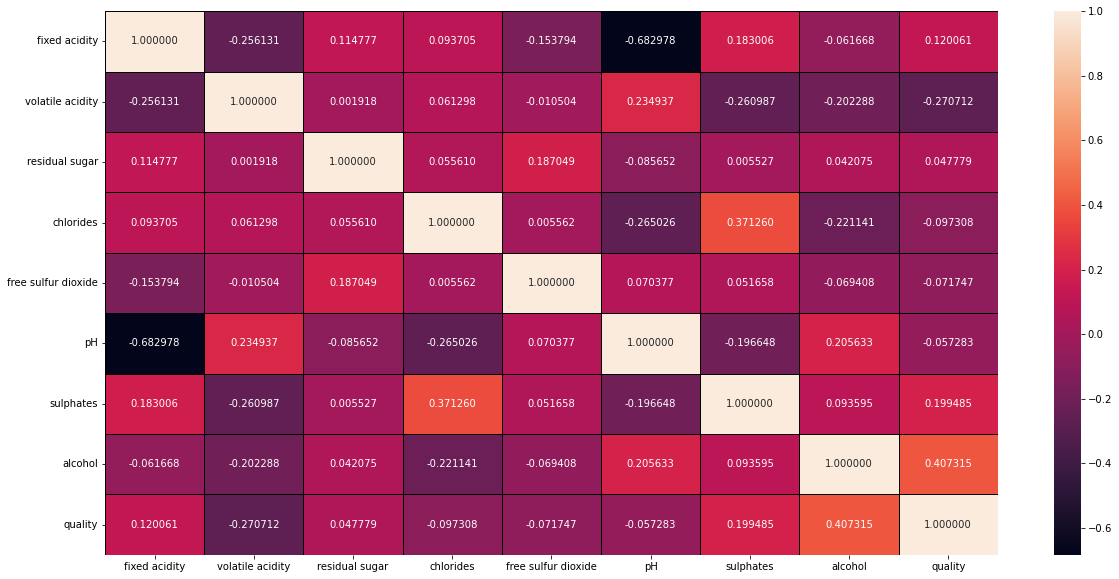

In [17]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor="black",fmt="f")

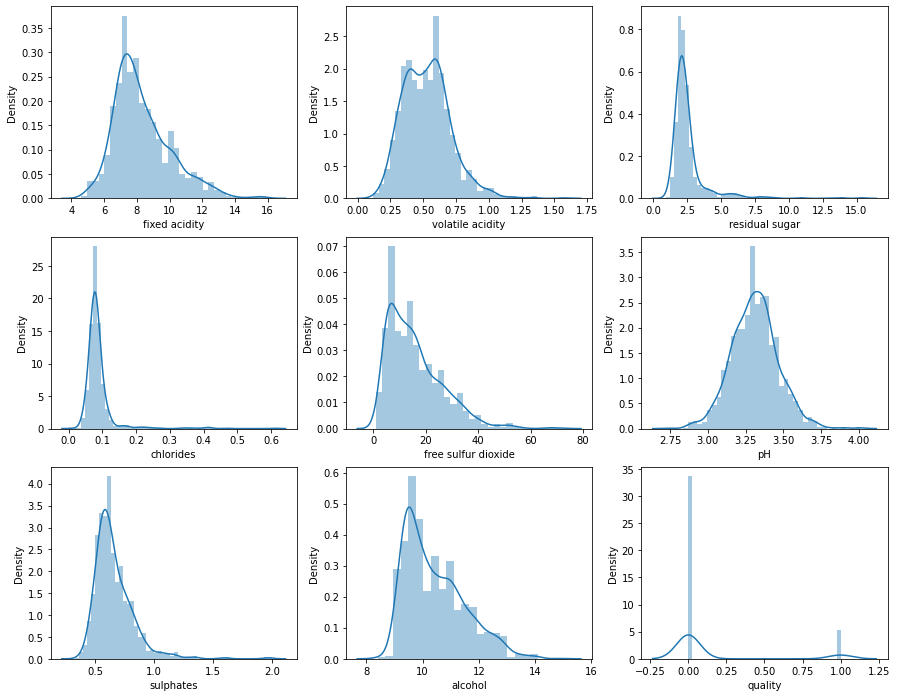

In [18]:
c=1
plt.figure(figsize=(15,12))
for i in df:
    #if c<=len(df.columns):
    ax= plt.subplot(3,3,c)
    sns.distplot(df[i])
    c+=1

Skewness present in the dataset

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fixed acidity        1599 non-null   float64
 1   volatile acidity     1599 non-null   float64
 2   residual sugar       1599 non-null   float64
 3   chlorides            1599 non-null   float64
 4   free sulfur dioxide  1599 non-null   float64
 5   pH                   1599 non-null   float64
 6   sulphates            1599 non-null   float64
 7   alcohol              1599 non-null   float64
 8   quality              1599 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 112.6 KB


In [20]:
x= df.drop(['quality'], axis=1)
y=df['quality']

In [21]:
#oversampling

from imblearn.over_sampling import SMOTE
sm= SMOTE(0.9)

X,Y= sm.fit_resample(x,y)

In [22]:
X.shape, Y.shape

((2625, 8), (2625,))

In [23]:
Y.value_counts()

0    1382
1    1243
Name: quality, dtype: int64

Here, we can see that the data now is balanced

In [24]:
# normalisation

norm= StandardScaler()
X_scaled= norm.fit_transform(X)

In [25]:
method=[LogisticRegression(), DecisionTreeClassifier(), SVC()]

for m in method:
    print("\nStarting with", m)
    acc= 0
    rs=0
    lr= m
    for i in range (200):
        x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=i)
        lr.fit(x_train, y_train)
        y_pred= lr.predict(x_test)
        accuracy= accuracy_score(y_test, y_pred)
        #print("{0} at random state {1}".format(accuracy, i))
    
        if accuracy>acc:
            acc=accuracy
            rs=i
            print("Best Accuracy now is {0} at random state {1}".format(acc,rs))


Starting with LogisticRegression()
Best Accuracy now is 0.8133333333333334 at random state 0
Best Accuracy now is 0.8171428571428572 at random state 1
Best Accuracy now is 0.8285714285714286 at random state 5
Best Accuracy now is 0.8361904761904762 at random state 9
Best Accuracy now is 0.8380952380952381 at random state 41
Best Accuracy now is 0.8419047619047619 at random state 58
Best Accuracy now is 0.8476190476190476 at random state 85
Best Accuracy now is 0.8495238095238096 at random state 92

Starting with DecisionTreeClassifier()
Best Accuracy now is 0.8761904761904762 at random state 0
Best Accuracy now is 0.8971428571428571 at random state 1
Best Accuracy now is 0.9085714285714286 at random state 4
Best Accuracy now is 0.9142857142857143 at random state 12
Best Accuracy now is 0.9238095238095239 at random state 40
Best Accuracy now is 0.9257142857142857 at random state 77
Best Accuracy now is 0.9333333333333333 at random state 142

Starting with SVC()
Best Accuracy now is 0.8

At Random state 92, we are getting 86.285% accuracy.

In [26]:
#train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=92)

### Logistic Regression

In [27]:
lr= LogisticRegression()
lr.fit(x_train, y_train)
y_pred= lr.predict(x_test)

In [28]:
#accuracy
accuracy= accuracy_score(y_test, y_pred)
accuracy

0.8495238095238096

In [29]:
#confusion_matrix
confusion_matrix(y_test, y_pred)

array([[226,  42],
       [ 37, 220]], dtype=int64)

In [30]:
#classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       268
           1       0.84      0.86      0.85       257

    accuracy                           0.85       525
   macro avg       0.85      0.85      0.85       525
weighted avg       0.85      0.85      0.85       525



### Decision tree

In [31]:
#train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=22)

In [32]:
dt= DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred= dt.predict(x_test)

In [33]:
#accuracy
accuracy= accuracy_score(y_test, y_pred)
accuracy

0.8933333333333333

In [34]:
#confusion_matrix
confusion_matrix(y_test, y_pred)

array([[247,  31],
       [ 25, 222]], dtype=int64)

In [35]:
#classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       278
           1       0.88      0.90      0.89       247

    accuracy                           0.89       525
   macro avg       0.89      0.89      0.89       525
weighted avg       0.89      0.89      0.89       525



### RandomForestClassifier

In [36]:
rf= RandomForestClassifier(n_estimators=200)
rf.fit(x_train, y_train)
y_pred= rf.predict(x_test)

In [37]:
#accuracy
accuracy_score(y_test, y_pred)

0.9466666666666667

In [38]:
#confusion matrix
confusion_matrix(y_test, y_pred)

array([[260,  18],
       [ 10, 237]], dtype=int64)

In [39]:
#classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       278
           1       0.93      0.96      0.94       247

    accuracy                           0.95       525
   macro avg       0.95      0.95      0.95       525
weighted avg       0.95      0.95      0.95       525



### Support vector classifier

In [40]:
#train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=117)

In [41]:
svc= SVC()
svc.fit(x_train, y_train)
y_pred= svc.predict(x_test)

In [42]:
#accuracy
accuracy_score(y_pred, y_test)

0.8819047619047619

In [43]:
# confusion matrix
confusion_matrix(y_test, y_pred)

array([[259,  35],
       [ 27, 204]], dtype=int64)

In [44]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       294
           1       0.85      0.88      0.87       231

    accuracy                           0.88       525
   macro avg       0.88      0.88      0.88       525
weighted avg       0.88      0.88      0.88       525



Random forest is working with better accuracy